In [1]:
import matplotlib_themes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx     # TODO: make a visualization class

from morknn.net import Net
# from morknn.activators import Activator
# from morknn.layers import Layer

%config InlineBackend.figure_formats = ['svg']

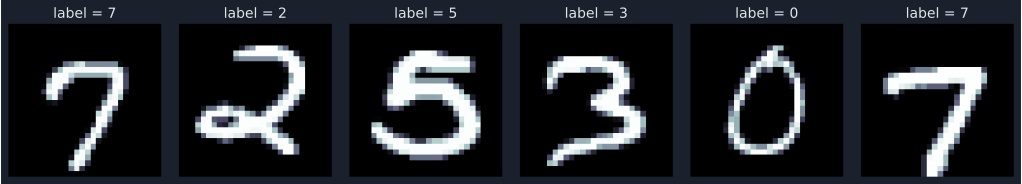

In [3]:
# mnist dataset tools
# TODO: create a library for visualizations

def mnist_dataset(split_factor=0.05):
    scale = 1 / 255
    data_df = pd.read_csv(f'./datasets/mnist/train.csv')
    data_x = data_df[data_df.columns[1:]].to_numpy() * scale
    data_y = data_df['label'].to_numpy()
    data_x = data_x.astype(np.float32)
    data_y = data_y.astype(np.float32)
    split_index = int(data_y.shape[0] * split_factor)
    train_x = data_x[split_index:, :]
    test_x = data_x[:split_index, :]
    train_y = data_y[split_index:]
    test_y = data_y[:split_index]
    return train_x.transpose(), train_y, test_x.transpose(), test_y

def plot_data(data_x, data_y, nplots=6):
    data_x = data_x.transpose()
    nplots = np.maximum(nplots, 6)
    random_index = int(np.random.uniform(nplots, train_x.shape[0]) - nplots)
    images = data_x[random_index:random_index + nplots]
    labels = data_y[random_index:random_index + nplots]
    fig, axes = plt.subplots(1, nplots, figsize=(2.4 * nplots, 2.5), sharex=True, sharey=True)
    for image, label, ax in zip(images, labels, axes):
        image = image.reshape(28, 28)
        ax.set_title(f'label = {label:.0f}')
        ax.imshow(image, cmap='bone')
        ax.axis('off')
    plt.tight_layout()

train_x, train_y, test_x, test_y = mnist_dataset()
plot_data(train_x, train_y)

## Example in math

$$
\large{
\mathbf{A}_{m, n} \cdot \mathbf{B}_{n, o} = \mathbf{C}_{m, o}\,, \qquad \text{where}\,\,  c_{i, j} = \sum_{k=0}^{n}a_{i, n}b_{n, j}
}
$$
The sum goes from $n\rightarrow k$. See [wikipedia](https://en.wikipedia.org/wiki/Matrix_multiplication)

### Example matrix multiplication

$$
\large{\begin{align}\mathbf{A}_{2, 3} \cdot \mathbf{B}_{3, 4} &= \mathbf{C}_{2, 4}\\[4pt]
\left(\begin{matrix}
a_{00} & a_{01} & a_{02}\\ 
a_{10} & a_{11} & a_{12}\\
\end{matrix}
\right) \cdot
\left(\begin{matrix}
b_{00} & b_{01} & b_{02} & b_{03}\\
b_{10} & b_{11} & b_{12} & b_{13}\\
b_{20} & b_{21} & b_{22} & b_{23}\\
\end{matrix}\right) &=
\left(
\begin{matrix}
c_{00} & c_{01} & c_{02} & c_{03}\\
c_{10} & c_{11} & c_{12} & c_{13}
\end{matrix}
\right)\end{align}}
$$

## Example numpy matmul

```python
[1] a = np.random.rand(2, 3).astype(np.float32)
    b = np.random.rand(3, 5).astype(np.float32)
    c = a@b
    c
```
```text
[1] array(
        [[0.4549801 , 0.6522088 , 1.0393813 , 0.67228025, 0.32949623],
        [0.65349907, 1.0044786 , 1.6312988 , 0.90355206, 0.581241  ]],
        dtype=float32
    )
```
```python
[2] c.shape == (a.shape[0], b.shape[-1])
    # c.shape = (a_rows, b_cols)
```
```text
[2] True
```

## Make a net

this is how I want the library to work
```python
[1] from morknn.net import Net 

    output_dims = [10, 10, 20, 10],
    input_dims = [train_x.shape[0], *output_dims[1:]],
    activations = ['relu', 'relu', 'relu', 'softmax']
    names = ['input', 'hidden_1', 'hidden_2', 'output']

    net = Net(input_dims, output_dims, activations, names=names)
    net.describe()
```
```text
[1] LAYER:
     -        name: 'input'
     - weights_dim: (784, 10)
     -    bias_dim: (784, 1)
     -       dtype: <class 'numpy.float32'>
     -  activation: <Activation: 'relu'>

    LAYER:
     -        name: 'hidden_1'
     - weights_dim: (10, 10)
     -    bias_dim: (10, 1)
     -       dtype: <class 'numpy.float32'>
     -  activation: <Activation: 'relu'>

    LAYER:
     -        name: 'hidden_2'
     - weights_dim: (20, 20)
     -    bias_dim: (20, 1)
     -       dtype: <class 'numpy.float32'>
     -  activation: <Activation: 'relu'>

    LAYER:
     -        name: 'output'
     - weights_dim: (10, 10)
     -    bias_dim: (10, 1)
     -       dtype: <class 'numpy.float32'>
     -  activation: <Activation: 'softmax'>
```


```python
# TODO: also want this way to work too
# net = Net()
# for input_dim, output_dim, activation, name in zip(input_dims, output_dims, activations, names):
#     net.add_layer(
#         Layer(input_dim=input_dim, output_dim=output_dim, activation=activation name=name)
#     )
    
net.train(train_x, train_y, learning_rate, epochs, batch_size)
net.validate(val_x, val_y)
```

In [4]:
print(f'train_x shape = {train_x.shape}')
print(f'train_y shape = {train_y.shape}')
print(f' test_x shape = {test_x.shape}')
print(f' test_x shape = {test_y.shape}')

train_x shape = (784, 39900)
train_y shape = (39900,)
 test_x shape = (784, 2100)
 test_x shape = (2100,)


In [7]:
output_dims = [10, 10, 20, 10]
input_dims = [train_x.shape[0], *output_dims[1:]]
activations = ['relu', 'relu', 'relu', 'softmax']
names = ['input', 'hidden_1', 'hidden_2', 'output']

net = Net(input_dims, output_dims, activations, names=names)
net.describe()

LAYER:
 -        name: 'input'
 - weights_dim: (784, 10)
 -    bias_dim: (784, 1)
 -       dtype: <class 'numpy.float32'>
 -  activation: <Activation: 'relu'>
        
LAYER:
 -        name: 'hidden_1'
 - weights_dim: (10, 10)
 -    bias_dim: (10, 1)
 -       dtype: <class 'numpy.float32'>
 -  activation: <Activation: 'relu'>
        
LAYER:
 -        name: 'hidden_2'
 - weights_dim: (20, 20)
 -    bias_dim: (20, 1)
 -       dtype: <class 'numpy.float32'>
 -  activation: <Activation: 'relu'>
        
LAYER:
 -        name: 'output'
 - weights_dim: (10, 10)
 -    bias_dim: (10, 1)
 -       dtype: <class 'numpy.float32'>
 -  activation: <Activation: 'softmax'>
        


In [20]:
class Net:
    def __init__(self, input_dims, output_dims, activations):
        self.DTYPE = np.float32
        self.input_dims = input_dims
        self.output_dims = output_dims
        self.activations = activations
        self.d_activations = [self.d_act(act) for act in activations]
        
    def build_net(self):
        self._net = []
        zipper = zip(self.input_dims, self.output_dims, self.activations, self.d_activations)
        for input_dim, output_dim, activation, d_activation in zipper: 
            self._net.append(
                [
                    self.weights((input_dim, output_dim)),
                    self.bias((input_dim, 1)),
                    self._act(activation),
                    self.d_act(d_activation)
                ]
            )
        return self._net



    
output_dims = [10, 10, 20, 10]
net = Net(
    output_dims=[10, 10, 20, 10],
    input_dims=[train_x.shape[0], *output_dims[1:]],
    activations=['relu', 'relu', 'relu', 'softmax'],
).build_net()

In [ ]:
class Trainer:
    def __init__(self, net):
        self.weights = net[0]
        self.biases = net[1]
        self.acts = net[2]
        self.DTYPE = np.float32
        
    def one_hot(data_y):
        n_labels = data_y.shape[0]
        n_options = int(data_y.max())
        one_hoty = np.zeros((n_labels, n_options + 1))
        one_hoty[np.arange(n_labels), data_y] = 1
        one_hoty = one_hoty.transpose()
        return one_hoty

    def feedforward(self, x):
        for w, b, a in zip(self.weights, self.biases, self.activations):
            x = a(np.dot(w, x) + b)
        return x

    def backpropagation(self, x, y):
        delta_w = [np.zeros(w.shape).astye(self.DTYPE) for w in self.weights]
        delta_b = [np.zeros(b.shape).astye(self.DTYPE) for b in self.biases]
        
        # feedforward
        activation = x
        activations = [x]
        zs = []
        for w, b, a in zip(self.weights, self.biases, self.acts):
            z = np.dot(w, activation) + b
            zs.append(z)
            activations.append(a[0](z))

        # backward pass
        y = self.one_hot(y)
        delta = (activations[-1] - y) * self.acts[-1][-1](zs[-1])
        delta_b[-1] = delta
        delta_w[-1] = np.dot(delta, activations[-2].transpose())
        
        for l in range(2, len(self.layers)):
            z = zs[-l]
            sp = self.acts[-l][-1](z)
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sp
            delta_b[-l] = delta
            delta_w[-l] = np.dot(delta, activations[-l - 1].transpose())
        return (delta_w, delta_b)

    def update_parameters(self, mini_batch, lr):
        delta_w = [np.zeros(w.shape).astype(np.float32) for w in self.weights]
        delta_b = [np.zeros(b.shape).astype(np.float32) for b in self.biases]
        for x, y in mini_batch:
            delta_delta_w, delta_delta_b = self.backpropagation(x, y)
            delta_w = [nw + dnw for nw, dnw in zip(delta_w, delta_delta_w)]
            delta_b = [nb + dnb for nb, dnb in zip(delta_b, delta_delta_b)]
        self.weights = [w - lr / len(mini_batch) * nw for w, nw in zip(self.weights, delta_w)]
        self.biases = [b - lr / len(mini_batch) * nb for b, nb in zip(self.biases, delta_b)]

    def train(self, epochs=5, mini_batch_size=10, lr=0.01):
        for epoch in range(epochs):
            # np.random.shuffle(training_data)
            mini_batches = [training_data[k:k + mini_batch_size] for k in range(0, len(training_data), mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_parameters(mini_batch, lr)
            print(f'Epoch {epoch} complete')